## Question 1 

See my paper, on which I derive the reestimation of the parameters ($\mu_k$ and $\Sigma_k$) for the Gaussian Mixture Model.

## Question 2

Text(0, 0.5, 'y coordinate')

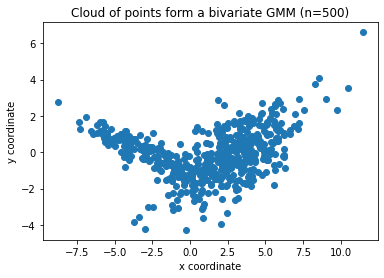

In [68]:
import numpy as np
import matplotlib.pyplot as plt



def simulate_bivariate_gmm(n, mu1, sigma1, mu2, sigma2):
    class_id = np.random.choice([0,1], n, p=[0.3, 0.7])
    points_list = []
    for e in class_id:
        if e == 0:
            points_list.append(np.random.multivariate_normal(mu1, sigma1))
        else:
            points_list.append(np.random.multivariate_normal(mu2, sigma2))
                    
    return points_list



mu1 = [-3, 0]
mu2 = [3, 0]
sigma1 = [[5, -2], [-2, 1]]
sigma2 = [[5, 2], [2, 2]]
n = 500


points_list = simulate_bivariate_gmm(n, mu1, sigma1, mu2, sigma2)
plt.scatter([e[0] for e in points_list], [e[1] for e in points_list])
            
plt.title("Cloud of points form a bivariate GMM (n=500)")   
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")









We see on the plot that we have 2 clusters whose shape is elliptical. We can easilly see that the center of each cluster is the mean of each normal distribution. We also see that one cluster has more samples than the other and this is directly coming from the probability of each class, class 2 has a probability of 0.7 whereas the probability of class 1 is only 0.3.

The value of the covariance matrix gives the shape of the ellipse and the direction and the strength of the dispersion wrt to each axis. 

## Questions 3 and 4 

Text(0.5, 1.0, 'Unistroke data for letter A')

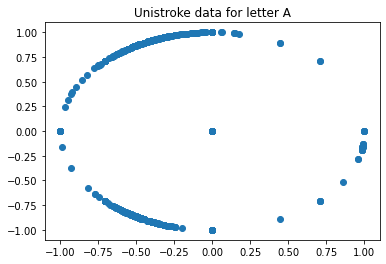

In [69]:
from math import sqrt

x = []
y = []

for i in range(1, 51):
    index = "0" + str(i) if i <= 9 else str(i) 
    current_x = []
    current_y = []
    with open('Unistroke/A' + index + '.txt','r') as f:
        for l in f:
            row = l.split()
            current_x.append(float(row[0]))
            current_y.append(float(row[1]))
            #print(row)
    direction_x = [current_x[i]-current_x[i-1] for i in range(1, len(current_x))]
    direction_y = [current_y[i]-current_y[i-1] for i in range(1, len(current_y))]
    norme_tab = [sqrt(dir_x**2+dir_y**2) for dir_x, dir_y in zip(direction_x, direction_y)]
    
    x = x + [0 if norm==0 else direc/norm for direc, norm in zip(direction_x, norme_tab)]
    y = y + [0 if norm==0 else direc/norm for direc, norm in zip(direction_y, norme_tab)]
        
plt.scatter(x, y)
plt.title("Unistroke data for letter A")
        

With this first look, we can assume that a 2 components GMM is appropriate for the A letter because it seems here that we have 2 clusters. Each cluster represents a 'bar' from the letter and has an elliptical shape. If we compare to the first plot, the cloud of points has the same shape as the bivariate model we used but with differents mean vectors and less dispersion. 

# 1.1.2 Data analysis : Gaussian Model

## Question 1

In [70]:
from sklearn.mixture import GaussianMixture


X = np.array([np.array([coord_x, coord_y]) for coord_x, coord_y in zip(x, y)])

gmm = GaussianMixture(2)
gmm.fit(X)

GaussianMixture(n_components=2)

In [75]:
print(gmm.weights_)

[0.45891914 0.54108086]


In [71]:
print(gmm.means_)

[[-0.26688928 -0.78192078]
 [-0.33607016  0.7445901 ]]


In [72]:
print(gmm.covariances_)

[[[ 0.25648605  0.10606443]
  [ 0.10606443  0.06088082]]

 [[ 0.07266609 -0.00684283]
  [-0.00684283  0.12372223]]]


## Question 2

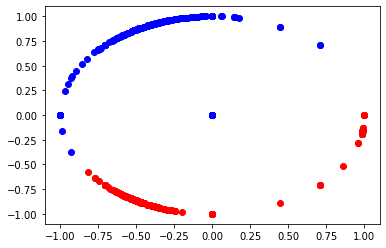

In [73]:
labels = gmm.predict(X)

x_class_0 = []
y_class_0 = []
x_class_1 = []
y_class_1 = []


for i in range(len(x)):
    if labels[i] == 0:
        x_class_0.append(X[i][0])
        y_class_0.append(X[i][1])
    else:
        x_class_1.append(X[i][0])
        y_class_1.append(X[i][1])
        
        
plt.scatter(x_class_0, y_class_0, color='red')
plt.scatter(x_class_1, y_class_1, color='blue')


def compoGMM(X, weights, means, covariances):
    res = 0
    for i in len(weights):
        res += weights[i]*
    